# FAST-UAV - Multirotor Design Optimization

[FAST-OAD](https://fast-oad.readthedocs.io) is a framework for performing rapid Overall Aircraft Design. The computational core of FAST-OAD is based on the  [OpenMDAO framework](https://openmdao.org/). <br>
FAST-UAV is the drone declination of FAST-OAD.

## 1. Setting up and analyzing the initial problem

To organize our work, we propose to use two user folders `data/` and `workdir/`. For instance, in `data/` we store a XML file which describes the [DJI Matrice 600 Pro](https://www.dji.com/matrice600-pro) multicopter. In `workdir/`, we store files generated or modified by FAST-UAV.

In [16]:
import os.path as pth
import openmdao.api as om
import logging
import shutil
import fastoad.api as oad
from fastuav.cmd.lca import *
from time import time
import matplotlib.pyplot as plt
import brightway2 as bw
from fastuav.utils.postprocessing.analysis_and_plots import *
from fastuav.utils.postprocessing.lca import *

plt.rcParams["figure.figsize"] = 16, 8
plt.rcParams.update({"font.size": 13})

DATA_FOLDER_PATH = "../data"
CONFIGURATIONS_FOLDER_PATH = "../configurations"
WORK_FOLDER_PATH = "./workdir"

CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "multirotor_lca.yaml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "problem_inputs_DJI_M600.xml")

ECOINVENT_PATH = r"D:/THESE/LCA_databases/ecoinvent 3.8_cutoff_ecoSpold02/datasets"   # path to the datasets subfolder; mind that the ecoinvent file must be unzipped.

# For having log messages display on screen
logging.basicConfig(level=logging.INFO, format="%(levelname)-8s: %(message)s")

# For using all screen width
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\f.pollet.ISAE-SUPAERO\AppData\Local\Temp\ipykernel_18448\4045395385.py:29: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [2]:
oad.generate_configuration_file(
    CONFIGURATION_FILE, overwrite=True, distribution_name="fastuav", sample_file_name="multirotor_lca.yaml"
)

INFO    : Loading FAST-OAD plugin uav
INFO    : Loading bundles from fastuav.models
INFO    : Installed bundle fastuav.models.structures.structures_hybrid (ID 104 )
INFO    : Installed bundle fastuav.models.aerodynamics.aerodynamics_hybrid (ID 13 )
INFO    : Installed bundle fastuav.models.propulsion.esc.definition_parameters (ID 49 )
INFO    : Installed bundle fastuav.models.propulsion.propeller.estimation_models (ID 69 )
INFO    : Installed bundle fastuav.models.stability.static_longitudinal.static_margin (ID 98 )
INFO    : Installed bundle fastuav.models.structures.tails (ID 106 )
INFO    : Installed bundle fastuav.models.aerodynamics.__init__ (ID 15 )
INFO    : Installed bundle fastuav.models.performance.mission.phase_builder (ID 34 )
INFO    : Installed bundle fastuav.models.propulsion.energy.battery.estimation_models (ID 43 )
INFO    : Installed bundle fastuav.models.propulsion.propeller.__init__ (ID 72 )
INFO    : Installed bundle fastuav.models.stability.__init__ (ID 100 )
INFO

'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\multirotor_lca.yaml'

------------------------------
### LCA project setup

In [3]:
create_lca_project(project_name="fastuav", db_path=ECOINVENT_PATH, db_name="ecoinvent 3.8_cutoff_ecoSpold02")

Biosphere database already present!!! No setup is needed
"ecoinvent 3.8_cutoff_ecoSpold02" database already present!!! No setup is needed
Available projects on your computer: 
 [Project: default, Project: StepByStep, Project: BW2 introduction, Project: bw2_seminar_2017, Project: bw2_uav, Project: bw2_uav_2, Project: fastuav, Project: fastua2v]
Available databases in project "fastuav": 
 ['biosphere3', 'ecoinvent 3.8_cutoff_ecoSpold02', 'Foreground DB']


---------------
The YAML configuration file located in the data folder defines the design problem, i.e. the model, the problem driver and the optimization problem definition.<br>
A useful feature is the [N2 diagram](http://openmdao.org/twodocs/versions/latest/basic_guide/make_n2.html) visualization available in OpenMDAO to see the structure of the model:

In [4]:
N2_FILE = pth.join(WORK_FOLDER_PATH, "n2.html")
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=N2_FILE, width="100%", height="500px")

INFO    : N2 diagram written in D:\THESE\Tools\FAST-UAV\src\fastuav\notebooks\workdir\n2.html


In the configuration file, we have specified an input file name 'problem_inputs.xml'. We can ask FAST-UAV to generate the inputs of the model with the reference parameters from 'problem_inputs_DJI_M600.xml' as default values:

In [5]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
INFO    : Problem inputs written in D:\THESE\Tools\FAST-UAV\src\fastuav\notebooks\workdir\problem_inputs.xml


'D:\\THESE\\Tools\\FAST-UAV\\src\\fastuav\\notebooks\\workdir\\problem_inputs.xml'

You can now checkout the generated [input file](./workdir/problem_inputs.xml). The values in this file can be modified by the user and will be considered by FAST-UAV when executing a computational process.<br>
The `variable-viewer` provides a way to inspect and modify the content of the XML file. The dropdown lists above the table allow to filter the displayed variable.

In [6]:
INPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_inputs.xml")
oad.variable_viewer(INPUT_FILE)

## 2. Running an MDO

You can now run an optimization problem. The last part of the configuration file .yaml is where this optimization problem is defined:

```yaml
optimization:
  design_variables:
    - name: data:weights:mtow:k # over estimation coefficient on the load mass
      upper: 40.0
      lower: 1.0
  constraints:
    - name: data:weights:mtow:guess:constraint # mass consistency
      lower: 0.0
  objective:
    - name: data:weights:mtow
      scaler: 1e-1
```

In [7]:
eval_problem = oad.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
INFO    : Created LCA object
INFO    : {'message': 'Started MultiLCA calculation', 'methods': [('ReCiPe 2016 v1.03, midpoint (E) no LT', 'climate change no LT', 'global warming potential (GWP1000) no LT'), ('ReCiPe 2016 v1.03, midpoint (E) no LT', 'acidification: terrestrial no LT', 'terrestrial acidification potential (TAP) no LT')], 'functional units': [[{'database': 'ecoinvent 3.8_cutoff_ecoSpold02', 'code': '3cff7e6ccbeae483942dfa12a93a5aec', 'amount': 1}], [{'database': 'ecoinvent 3.8_cutoff_ecoSpold02', 'code': '910ad8e5f36aabe962d6bf1c07abff24', 'amount': 1}], [{'database': 'ecoinvent 3.8_cutoff_ecoSpold02', 'code': '5f83b772ba1476f12d0b3ef634d4409b', 'amount': 1}], [{'dat

In [46]:
optim_problem = oad.optimize_problem(CONFIGURATION_FILE, overwrite=True)

Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it
Db Foreground DB was here. Reseting it


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1.542220751795574
            Iterations: 9
            Function evaluations: 9
            Gradient evaluations: 9
Optimization Complete
-----------------------------------


INFO    : Computation finished after 48.84 seconds
INFO    : Problem outputs written in D:\THESE\Tools\FAST-UAV\src\fastuav\notebooks\workdir\problem_outputs.xml


Let's save these results:

In [47]:
OUTPUT_FILE = pth.join(WORK_FOLDER_PATH, "problem_outputs.xml")
DJI_M600_OUTPUT_FILE = pth.join(DATA_FOLDER_PATH, 'problem_outputs_DJI_M600_mdo.xml')
shutil.copy(OUTPUT_FILE, DJI_M600_OUTPUT_FILE)

'../data\\problem_outputs_DJI_M600_mdo.xml'

The `optimizer_viewer` offers a convenient summary of the optimization result. If design variables or constraints have active bounds they are yellow whereas they are red if they are violated.

In [48]:
oad.optimization_viewer(CONFIGURATION_FILE)

D:\Softwares\Miniconda3\envs\FAST-UAV\lib\site-packages\jupyter_client\session.py:719: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



You can use the `VariableViewer` tool to see the optimization results for all variables of the system by loading the .xml output file:

In [49]:
oad.variable_viewer(OUTPUT_FILE)

## 3. Analysis and plots

You can now use postprocessing plots to visualize the results of the MDO.

### 3.1 - Geometry and mass breakdown

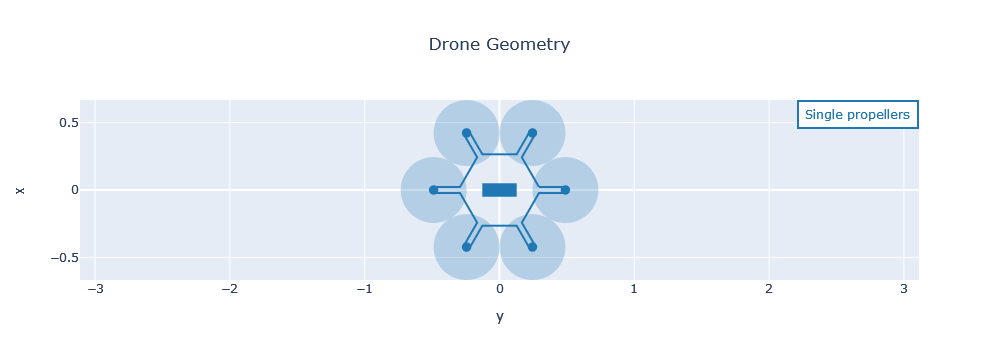

In [50]:
fig = multirotor_geometry_plot(DJI_M600_OUTPUT_FILE, name="Drone MDO")
fig.show()

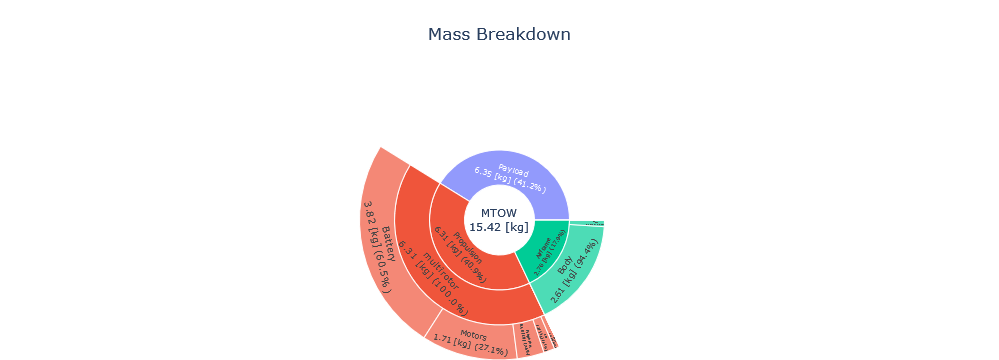

In [51]:
fig = mass_breakdown_sun_plot_drone(DJI_M600_OUTPUT_FILE)
fig.show()

### 3.2 - LCA results

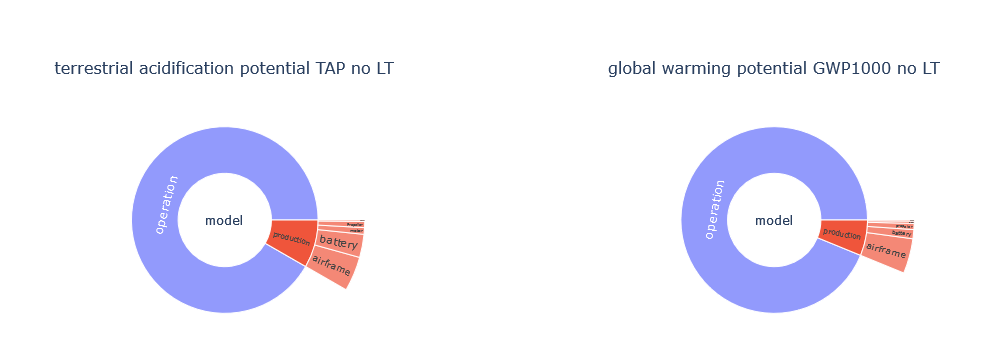

In [52]:
fig = lca_sun_plot(DJI_M600_OUTPUT_FILE)
fig.show()

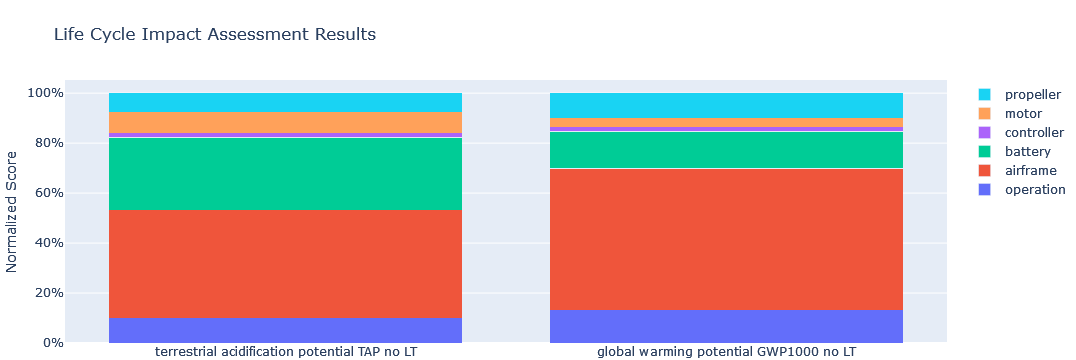

In [15]:
fig = lca_bar_plot(DJI_M600_OUTPUT_FILE)
fig.show()

### 3.3 - Advanced LCA studies

In [19]:
# get all activities created in LCA module
activities = get_lca_activities()
activities

['motor' (kg, GLO, None),
 'model' (uav lifetime, GLO, None),
 'propeller' (kg, GLO, None),
 'airframe' (kg, GLO, None),
 'operation' (kilowatt hour, GLO, None),
 'controller' (kg, GLO, None),
 'production' (uav, GLO, None),
 'battery' (kg, GLO, None)]

In [31]:
# select 'model' activity
model = activities[1]

In [32]:
# list available parameters
list_lca_parameters()

group,name,label,default,min,max,std,distrib,unit,db
,elec_switch_param,elec switch param,eu,,,,,,Foreground DB
,mass_airframe,mass airframe,1.0,0,1000,,linear,,Foreground DB
,mass_batteries,mass batteries,1.0,0,1000,,linear,,Foreground DB
,mass_controllers,mass controllers,1.0,0,1000,,linear,,Foreground DB
,mass_motors,mass motors,1.0,0,1000,,linear,,Foreground DB
,mass_payload,mass payload,1.0,0,1000,,linear,,Foreground DB
,mass_propellers,mass propellers,1.0,0,1000,,linear,,Foreground DB
,mission_distance,mission distance,1.0,1,1000,,linear,,Foreground DB
,mission_energy,mission energy,1.0,0,1000,,linear,,Foreground DB
,n_cycles,n cycles,1.0,1,10000,,linear,,Foreground DB


#### Monte Carlo

INFO    : Created LCA object
INFO    : Seeded RNGs


Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_us*mission_energy*n_cycles => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_eu*mission_energy*n_cycles => 583
Freezing 'operation' (kilowatt hour, GLO, None) // market for electricity, low voltage : elec_switch_param_fr*mission_energy*n_cycles => 0
Freezing 'production' (uav, GLO, None) // battery : mass_batteries => 3
Freezing 'production' (uav, GLO, None) // motor : mass_motors => 1
Freezing 'production' (uav, GLO, None) // airframe : mass_airframe => 2
Freezing 'production' (uav, GLO, None) // propeller : mass_propellers => 0
Freezing 'production' (uav, GLO, None) // controller : mass_controllers => 0


INFO    : Created LCA object
INFO    : Seeded RNGs


Freezing 'production' (uav, GLO, None) // battery : mass_batteries => 3
Freezing 'production' (uav, GLO, None) // motor : mass_motors => 1
Freezing 'production' (uav, GLO, None) // airframe : mass_airframe => 2
Freezing 'production' (uav, GLO, None) // propeller : mass_propellers => 0
Freezing 'production' (uav, GLO, None) // controller : mass_controllers => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_us*mission_energy*n_cycles => 583
Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_eu*mission_energy*n_cycles => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market for electricity, low voltage : elec_switch_param_fr*mission_energy*n_cycles => 0


INFO    : Created LCA object
INFO    : Seeded RNGs


Freezing 'production' (uav, GLO, None) // battery : mass_batteries => 3
Freezing 'production' (uav, GLO, None) // motor : mass_motors => 1
Freezing 'production' (uav, GLO, None) // airframe : mass_airframe => 2
Freezing 'production' (uav, GLO, None) // propeller : mass_propellers => 0
Freezing 'production' (uav, GLO, None) // controller : mass_controllers => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_us*mission_energy*n_cycles => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market group for electricity, low voltage : elec_switch_param_eu*mission_energy*n_cycles => 0
Freezing 'operation' (kilowatt hour, GLO, None) // market for electricity, low voltage : elec_switch_param_fr*mission_energy*n_cycles => 583


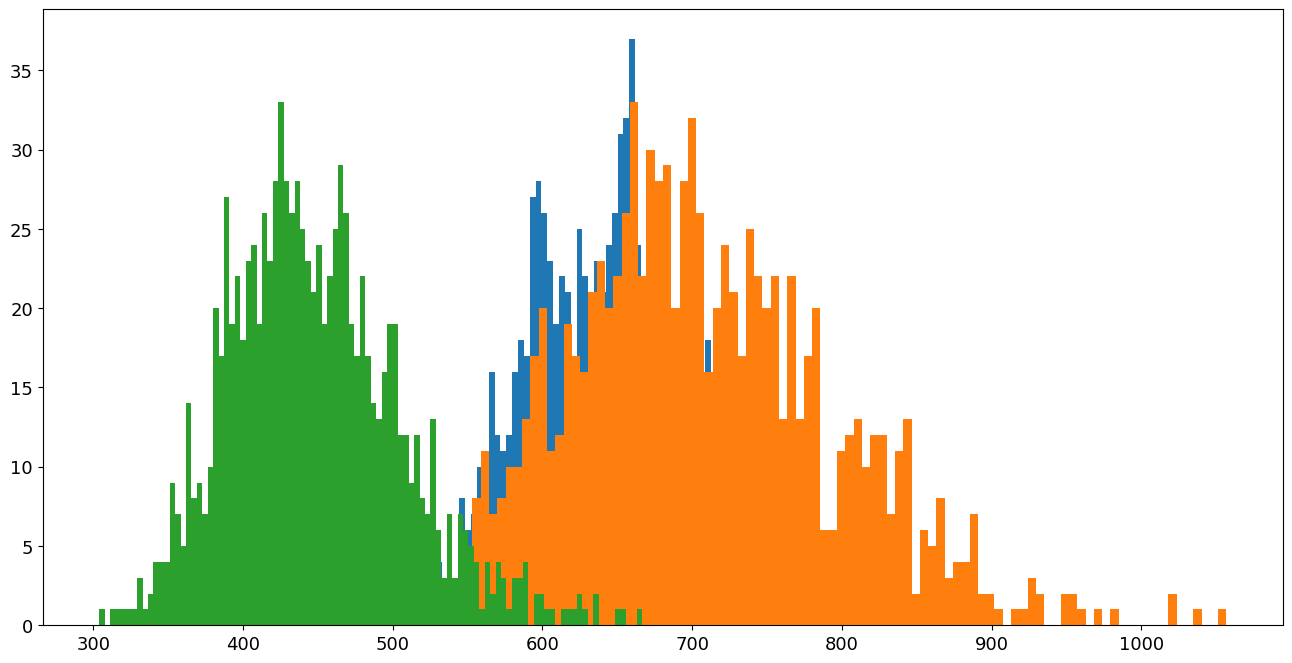

In [41]:
# Run Monte Carlo

parameters = {
    'mass_airframe': 2.76,
    'mass_batteries': 3.82,
    'mass_controllers': 0.033,
    'mass_motors': 1.71,
    'mass_payload': 6.35,
    'mass_propellers': 0.48,
    'mission_distance': 0.001,
    'mission_energy': 2101.4 / 3600,
    'n_cycles': 1000.0
}
method = ('ReCiPe 2016 v1.03, midpoint (E) no LT', 'climate change no LT', 'global warming potential (GWP1000) no LT')

for elec in list(["eu", "us", "fr"]):
    parameters["elec_switch_param"] = elec
    scores_array = LCAMonteCarlo(
        model, # the model
        method, # impacts to assess 

        # Number of Monte Carlo runs
        n_runs=1000, 

        # Parameters of the model
        **parameters
    )
    plt.hist(scores_array[0],bins=100);
    
plt.show()

#### DoE

In [45]:
import lca_algebraic as lcalg
# Fast computation for millions of separate samples
parameters = {
    'mass_airframe': 2.76,
    'mass_batteries': 3.82,
    'mass_controllers': 0.033,
    'mass_motors': 1.71,
    'mass_payload': 6.35,
    'mass_propellers': 0.48,
    'mission_distance': 0.001,
    'mission_energy': 2101.4 / 3600,
    'n_cycles': [100.0, 1000.0, 10000.0, 10000.0, 10000000.0],
    "elec_switch_param": "eu"
}
method = [('ReCiPe 2016 v1.03, midpoint (E) no LT', 'climate change no LT', 'global warming potential (GWP1000) no LT')]

lcalg.multiLCAAlgebric(
    model, # The model 
    method, # Impacts
    
    # Parameters of the model
    **parameters
)

,ReCiPe_2016_v1_03:_midpoint_E_no_LT:climate_change_no_LT:global_warming_potential_GWP1000_no_LT[kg CO2-Eq]
0,370.259532
1,590.097086
2,2788.472628
3,2788.472628
